# Decision Trees in Python using scikit-learn

### 1. Imports

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### 2. Data Reading and checking for nulls

In [33]:
breastCancerData = pd.read_csv("./data/kodeinData.csv", header=0)

In [34]:
breastCancerData

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [35]:
breastCancerData.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [36]:
#Renaming columns to remove spaces for easier direct accessing
breastCancerData.columns = ['Age', 'Race', 'Marital Status', 'TStage', 'NStage', '6thStage',
       'differentiate', 'Grade', 'AStage', 'TumorSize', 'EstrogenStatus',
       'ProgesteroneStatus', 'RegionalNodeExamined',
       'ReginolNodePositive', 'SurvivalMonths', 'Status']
breastCancerData.columns

Index(['Age', 'Race', 'Marital Status', 'TStage', 'NStage', '6thStage',
       'differentiate', 'Grade', 'AStage', 'TumorSize', 'EstrogenStatus',
       'ProgesteroneStatus', 'RegionalNodeExamined', 'ReginolNodePositive',
       'SurvivalMonths', 'Status'],
      dtype='object')

In [37]:
#Checking for Nulls:
for i in breastCancerData.columns:
    print(breastCancerData[i].hasnans)
    
print()

# Extracting unique values of all columns
for i in breastCancerData.columns:
    print(breastCancerData[i].unique())

print(breastCancerData.dtypes)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

[68 50 58 47 51 40 69 46 65 48 62 61 56 43 60 57 55 63 66 53 59 54 49 64
 42 37 67 31 52 33 45 38 39 36 41 44 32 34 35 30]
['White' 'Black' 'Other']
['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
['T1' 'T2' 'T3' 'T4']
['N1' 'N2' 'N3']
['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
['3' '2' '1' ' anaplastic; Grade IV']
['Regional' 'Distant']
[  4  35  63  18  41  20   8  30 103  32  13  59  15  19  46  24  25  29
  40  70  22  50  17  21  10  27  23   5  51   9  55 120  77   2  11  12
  26  75 130  34  80   3  60  14  16  45  36  76  38  49   7  72 100  43
  62  37  68  52  85  57  39  28  48 110  65   6 105 140  42  31  90 108
  98  47  54  61  74  33   1  87  81  58 117  44 123 133  95 107  92  69
  56  82  66  78  97  88  53  83 101  84 115  73 125 104  94  86  64  96
  79  67]
['Positive' 'Negativ

#### Classification of Columns
We observe that the columns can be classifies as follows:
1. float columns: 'Age', 'TumorSize', 'RegionalNodeExamined',
       'ReginolNodePositive' and 'SurvivalMonths'
2. Category Columns: 'Race', 'Marital Status', 'TStage', 'NStage', '6thStage',
       'differentiate', 'Grade', 'AStage', 'EstrogenStatus',
       and 'ProgesteroneStatus'
3. Since 'AStage', 'EstrogenStatus', 'ProgesteroneStatus' and 'Status' have only two values, it is to be modified separately, to give binary output
This is based on the definitions of the data present in the columns, as the data in the columns classified as "Category Columns" is Fixed out of several options.

Since sklearn decision trees take float columns to be grouped data, category columns need to be separated to avoid grouping them together, citing 'similarity' on any basis.

In [38]:
#Separation of X and Y data. Y axis holds Alive/Dead. Hence
X = breastCancerData.drop('Status', axis = 1).copy()
Y = breastCancerData.Status.copy()
# globalRandomState = 1

In [39]:
# Splitting Columns: 
categoryAdjustedX = pd.get_dummies(X, columns=['Race', 'Marital Status', 'TStage','NStage', '6thStage', 'differentiate', 'Grade'])


# Reformatting Columns:
tempAstage = categoryAdjustedX.AStage.copy()
tempEstrogenStatus = categoryAdjustedX.EstrogenStatus.copy()
tempProgesteroneStatus = categoryAdjustedX.ProgesteroneStatus.copy()

tempAstage[tempAstage == "Regional"] = 1
tempAstage[tempAstage == "Distant"] = 0
categoryAdjustedX.AStage = tempAstage.astype(bool)

tempEstrogenStatus[tempEstrogenStatus == "Positive"] = 1
tempEstrogenStatus[tempEstrogenStatus == "Negative"] = 0
categoryAdjustedX.EstrogenStatus = tempEstrogenStatus.astype(bool)

tempProgesteroneStatus[tempProgesteroneStatus == "Positive"] = 1
tempProgesteroneStatus[tempProgesteroneStatus == "Negative"] = 0
categoryAdjustedX.ProgesteroneStatus = tempProgesteroneStatus.astype(bool)


# Reformatting Y
categoryAdjustedY = Y.copy()
categoryAdjustedY[categoryAdjustedY == "Alive"] = 1
categoryAdjustedY[categoryAdjustedY == "Dead"] = 0
categoryAdjustedY = categoryAdjustedY.astype(bool)


categoryAdjustedX.dtypes



Age                                        int64
AStage                                      bool
TumorSize                                  int64
EstrogenStatus                              bool
ProgesteroneStatus                          bool
RegionalNodeExamined                       int64
ReginolNodePositive                        int64
SurvivalMonths                             int64
Race_Black                                  bool
Race_Other                                  bool
Race_White                                  bool
Marital Status_Divorced                     bool
Marital Status_Married                      bool
Marital Status_Separated                    bool
Marital Status_Single                       bool
Marital Status_Widowed                      bool
TStage_T1                                   bool
TStage_T2                                   bool
TStage_T3                                   bool
TStage_T4                                   bool
NStage_N1           

### 3. Decision Tree Creation
Now that we have the data organised as we want, we can make the decision tree

In [40]:
#We use the 'train_test_split' function to split the data between testing data and training data
trainingX, testingX, trainingY, testingY = train_test_split(categoryAdjustedX, categoryAdjustedY)# Random state chosen at random.
trainingX

,Age,AStage,TumorSize,EstrogenStatus,ProgesteroneStatus,RegionalNodeExamined,ReginolNodePositive,SurvivalMonths,Race_Black,Race_Other,...,6thStage_IIIB,6thStage_IIIC,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3
2242,68,True,60,False,False,13,12,64,True,False,...,False,True,True,False,False,False,False,False,True,False
2879,69,True,12,True,False,12,1,92,False,False,...,False,False,True,False,False,False,False,False,True,False
2514,49,True,20,True,True,13,5,65,True,False,...,False,False,True,False,False,False,False,False,True,False
2644,67,True,50,True,True,12,10,10,False,False,...,False,True,False,True,False,False,False,False,False,True
1529,46,True,28,True,True,10,2,47,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933,56,True,35,True,False,24,13,73,False,False,...,False,True,True,False,False,False,False,False,True,False
2170,45,True,32,True,True,21,2,64,False,True,...,False,False,True,False,False,False,False,False,True,False
4005,68,True,40,True,False,14,2,76,False,False,...,False,False,True,False,False,False,False,False,True,False
1809,62,True,8,True,True,1,1,107,False,False,...,False,False,True,False,False,False,False,False,True,False


In [41]:
trainingY

2242     True
2879     True
2514     True
2644    False
1529    False
        ...  
3933     True
2170     True
4005     True
1809     True
899      True
Name: Status, Length: 3018, dtype: bool

In [42]:
#Creation of a temporaty tree without any value of alpha:
classificationTree = DecisionTreeClassifier()
classificationTree = classificationTree.fit(trainingX, trainingY)

#### Pruning the decision tree

In [43]:
# Determination of an optimal alpha through cost_complexity_pruning
currentPruningPath = classificationTree.cost_complexity_pruning_path(trainingX, trainingY)
alphaList = currentPruningPath.ccp_alphas[:-1]
treeList = []
for alpha in alphaList:
    classificationTree = DecisionTreeClassifier(ccp_alpha=alpha)
    classificationTree.fit(trainingX, trainingY)
    treeList.append(classificationTree)

#### Scoring and benchmarking

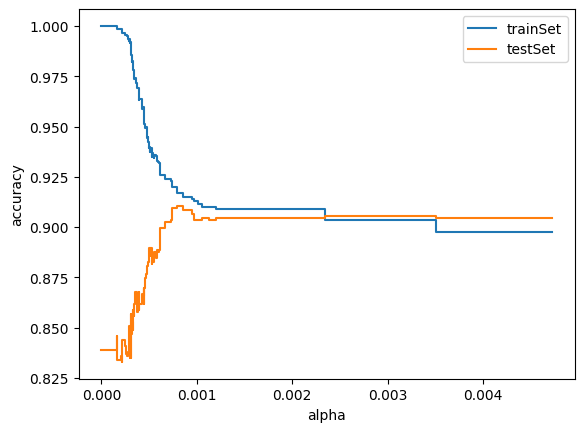

In [44]:
trainingSetScore = [tempTree.score(trainingX, trainingY) for tempTree in treeList]
testingSetScore = [tempTree.score(testingX, testingY) for tempTree in treeList]

figure, axes = plt.subplots()
axes.set_xlabel("alpha")
axes.set_ylabel("accuracy")
axes.plot(alphaList, trainingSetScore, label="trainSet", drawstyle='steps-post')
axes.plot(alphaList, testingSetScore, label="testSet", drawstyle='steps-post')
axes.legend()
testingSetScore

plt.show()

In [45]:
bestAccuracy = abs(testingSetScore[0] - trainingSetScore[0])
index = 0
for i in range(0, len(trainingSetScore)):
    if(bestAccuracy > (abs(testingSetScore[i] - trainingSetScore[i]))):
        bestAccuracy = abs(testingSetScore[i] - trainingSetScore[i])
        index = i
    elif(bestAccuracy > (abs(testingSetScore[i] - trainingSetScore[i]))):
        if(max([testingSetScore[i], trainingSetScore[i]]) >= max([testingSetScore[index], trainingSetScore[index]])):
            bestAccuracy = abs(testingSetScore[i] - trainingSetScore[i])
            index = i

The best suited value of alpha, here, lies at the point of least distance from the two plots, as observed from the graph
#### Cross Validation for optimum alpha

<Axes: xlabel='alpha'>

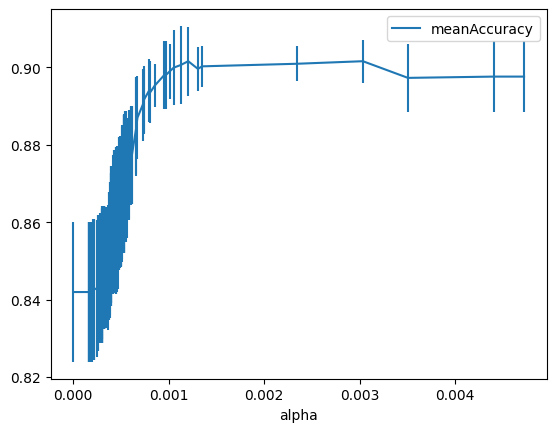

In [46]:
alpha_loop_values = []
for currentAlpha in alphaList:
    currentTree = DecisionTreeClassifier(random_state=0, ccp_alpha=currentAlpha)
    crossValidationScores = cross_val_score(currentTree, trainingX, trainingY, cv=5)
    alpha_loop_values.append([currentAlpha, np.mean(crossValidationScores), np.std(crossValidationScores)])


alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'meanAccuracy', 'standardDeviation'])
alpha_results.plot(x = 'alpha', y = 'meanAccuracy', yerr = 'standardDeviation')

In [47]:
maxAccuracy = max(alpha_results['meanAccuracy'])
optimumAlpha = 0
minDiffAlpha = 0
for i in range(0, len(alpha_results)):
    if(alpha_results.meanAccuracy[i] == bestAccuracy):
        minDiffAlpha = alpha_results.alpha[i]
        break

optimumAlpha = minDiffAlpha
optimumAlpha = float(alpha_results.alpha[index])
print(index, optimumAlpha)


130 0.0023406132320723527


In [48]:
prunedClassificationTree = DecisionTreeClassifier(ccp_alpha=optimumAlpha)
prunedClassificationTree = prunedClassificationTree.fit(trainingX, trainingY)

In [49]:
predictions = prunedClassificationTree.predict(testingX)
print("Accuracy After Pruning: ", str(prunedClassificationTree.score(testingX, testingY) * 100)+"%")

Accuracy After Pruning:  90.55666003976143%


In [50]:
print("Classification Report:\n", classification_report(testingY, predictions))

Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.37      0.53       145
        True       0.90      1.00      0.95       861

    accuracy                           0.91      1006
   macro avg       0.92      0.68      0.74      1006
weighted avg       0.91      0.91      0.89      1006



Tree Diagram:


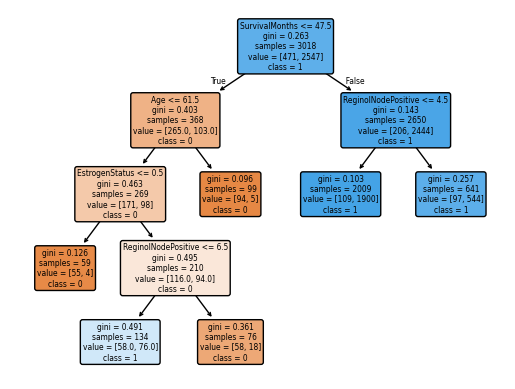

In [51]:
print("Tree Diagram:")
plot_tree(prunedClassificationTree, filled=True, rounded=True, class_names=['0', '1'], feature_names=categoryAdjustedX.columns)
plt.show()

Confusion Matrix:


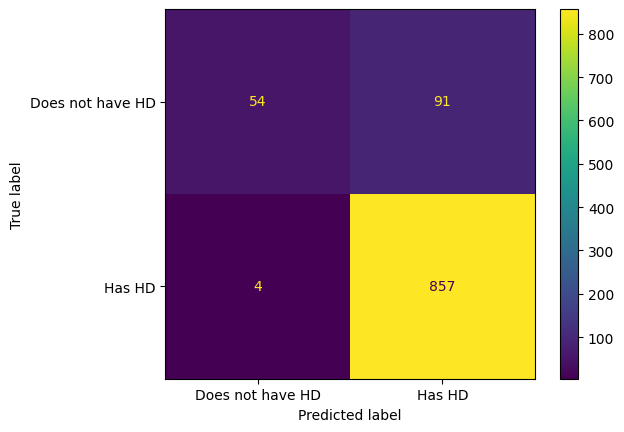

In [52]:
print("Confusion Matrix:")
confusionMatrix = confusion_matrix(testingY, predictions, labels=prunedClassificationTree.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels=['Does not have HD', "Has HD"])
display.plot()
plt.show()